In [2]:
from imp import reload
from utils import utils
from glob import glob
from tqdm import tqdm
import pandas as pd
import numpy as np
import os
import re
reload(utils)
from matplotlib import pyplot as plt

In [3]:
# 统计训练集 txt 的数量
# 统计测试集 txt 的数量
print('train txt file:{}'.format(len(glob('../data/train_data/*.txt'))))
print('test txt file:{}'.format(len(glob('../data/test_data/*.txt'))))

train txt file:2515
test txt file:3956


In [4]:
# 对标签进行分析
label_lst = glob('../data/train_label/*.csv')
label_total = []
for i in tqdm(label_lst):
    label_total.append(pd.read_csv(i).values)
label_total = np.concatenate(label_total,axis=0)
label_total = pd.DataFrame(label_total,columns= ['ID','Category','Pos_b','Pos_e','Privacy'])

100%|██████████| 2515/2515 [00:06<00:00, 418.37it/s]


In [24]:
# 查看标签种类
print(np.unique(label_total.Category))

['QQ' 'address' 'book' 'company' 'email' 'game' 'government' 'mobile'
 'movie' 'name' 'organization' 'position' 'scene' 'vx']


In [25]:
# 查看标签分布
pd.value_counts(label_total.Category)

position        3580
name            3422
organization    2329
company         2150
address         2056
movie           1901
game            1571
government      1187
scene            990
book             734
mobile           277
email            259
QQ                28
vx                19
Name: Category, dtype: int64

In [29]:
# 查看是否每个 train data 的 txt 都是没换行符号
# 保证每个文本只有一行，方便处理，如果不是，把原来的多行变成一行
tdata_lst = glob('../data/train_data/*.txt')

In [34]:
for td in tdata_lst:
    if len(utils.read_txt(td))!=1:
        print(td)

- `../data/train_data/2162.txt`
- `../data/train_data/1907.txt`
- `../data/train_data/488.txt`
- `../data/train_data/2048.txt`
- `../data/train_data/747.txt`
- `../data/train_data/1571.txt`
- `../data/train_data/1501.txt`

(array([4.570e+02, 1.025e+03, 3.900e+02, 1.970e+02, 1.410e+02, 8.700e+01,
        7.400e+01, 4.200e+01, 2.800e+01, 2.300e+01, 2.100e+01, 9.000e+00,
        9.000e+00, 4.000e+00, 0.000e+00, 2.000e+00, 2.000e+00, 3.000e+00,
        0.000e+00, 1.000e+00]),
 array([  6. ,  54.4, 102.8, 151.2, 199.6, 248. , 296.4, 344.8, 393.2,
        441.6, 490. , 538.4, 586.8, 635.2, 683.6, 732. , 780.4, 828.8,
        877.2, 925.6, 974. ]),
 <a list of 20 Patch objects>)

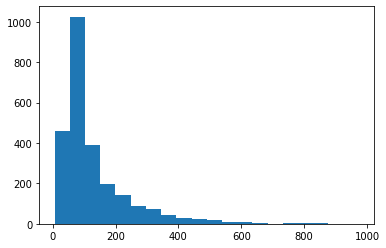

In [44]:
# 查看每个 train data 的 txt 中的长度
len_lst = []
for td in tdata_lst:
    len_lst.append(len(utils.read_txt(td)[0]))
plt.hist(len_lst,bins=20)

../data/test_data/1290.txt
../data/test_data/2673.txt
../data/test_data/2652.txt
../data/test_data/44.txt
../data/test_data/3932.txt


(array([4.170e+02, 2.807e+03, 3.330e+02, 1.560e+02, 9.000e+01, 5.500e+01,
        3.900e+01, 1.800e+01, 1.300e+01, 1.100e+01, 3.000e+00, 5.000e+00,
        4.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 3.000e+00]),
 array([   5.  ,   59.25,  113.5 ,  167.75,  222.  ,  276.25,  330.5 ,
         384.75,  439.  ,  493.25,  547.5 ,  601.75,  656.  ,  710.25,
         764.5 ,  818.75,  873.  ,  927.25,  981.5 , 1035.75, 1090.  ]),
 <a list of 20 Patch objects>)

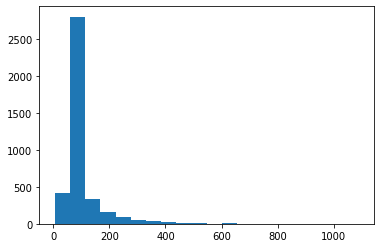

In [43]:
# 查看是否每个 test data 的 txt 都是没换行符号
# 查看每个 test data 的 txt 中的长度
tedata_lst = glob('../data/test_data/*.txt')
for td in tedata_lst:
    if len(utils.read_txt(td))!=1:
        print(td)
len_te_lst = []
for td in tedata_lst:
    len_te_lst.append(len(utils.read_txt(td)[0]))
plt.hist(len_te_lst,bins=20)

In [1]:
label_total[label_total.Category == 'movie'].head(5)
tmp1 = label_total[label_total.Category == 'movie']
def func(x):
    if x[0] in ('《','≪','（','(','＜','“','「','【') and x[-1] in ('》','≫','）',')','＞','”','」','】'):
        return True
    else:
        return False
tmp1[~tmp1.Privacy.apply(lambda x:func(x))]

NameError: name 'label_total' is not defined

In [79]:
label_total[label_total.Category == 'game'].head(5)
tmp2 = label_total[label_total.Category == 'game']
tmp2[~tmp2.Privacy.apply(lambda x:func(x))]

,ID,Category,Pos_b,Pos_e,Privacy
25,237,game,0,4,魔兽争霸3
130,592,game,60,63,WAR3
133,592,game,87,94,SF“特种部队”
187,2094,game,5,8,DOTA
231,974,game,54,57,CSOL
264,141,game,12,40,《超世纪战警：突袭黑暗雅典娜》（TheChronicles
270,97,game,35,39,dota2
272,97,game,76,79,DotA
275,97,game,136,140,星际争霸2
324,1370,game,167,170,虚拟战场


In [81]:
label_total[label_total.Category == 'book'].head(5)
tmp3 = label_total[label_total.Category == 'game']
tmp3[~tmp2.Privacy.apply(lambda x:func(x))]

,ID,Category,Pos_b,Pos_e,Privacy
25,237,game,0,4,魔兽争霸3
130,592,game,60,63,WAR3
133,592,game,87,94,SF“特种部队”
187,2094,game,5,8,DOTA
231,974,game,54,57,CSOL
264,141,game,12,40,《超世纪战警：突袭黑暗雅典娜》（TheChronicles
270,97,game,35,39,dota2
272,97,game,76,79,DotA
275,97,game,136,140,星际争霸2
324,1370,game,167,170,虚拟战场


In [103]:
# 查看每个 train data 的 txt 中的标点符号
import re
filter_p = re.compile(r'[^\u4e00-\u9fa50-9A-Za-z]')
symbol_lst = []
for td in tdata_lst:
    symbol_lst += re.findall(filter_p,utils.read_txt(td)[0])
symbol_lst = np.unique(symbol_lst)

In [104]:
symbol_lst

array(['\t', '!', '"', '#', '%', '&', "'", '(', ')', '*', '+', '-', '.',
       '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_',
       '`', '{', '|', '}', '~', '«', '·', '»', '×', 'ω', 'ค', 'ช', 'ต',
       'ะ', 'า', 'โ', '\u2006', '—', '‘', '’', '“', '”', '•', '…',
       '\u2029', '\u202a', '\u202c', '※', 'Ⅱ', 'Ⅲ', 'Ⅳ', 'Ⅶ', 'ⅰ', 'ⅱ',
       'ⅲ', 'ⅳ', 'ⅵ', '↑', '→', '↓', '∩', '∶', '≪', '≫', '⊙', '⋯', '①',
       '②', '─', '┃', '■', '□', '◆', '●', '★', '☆', '☏', '♪', '\u3000',
       '、', '。', '〃', '〈', '〉', '《', '》', '「', '」', '『', '』', '【', '】',
       '〜', 'あ', 'い', 'え', 'が', 'き', 'く', 'こ', 'し', 'す', 'た', 'ち', 'っ',
       'つ', 'て', 'で', 'と', 'な', 'に', 'の', 'は', 'ま', 'み', 'や', 'ら', 'る',
       'れ', 'を', 'ん', 'コ', 'ス', 'タ', 'ト', 'ニ', '・', 'ー', '䢖', '녕', '세',
       '안', '요', '하', '\ue056', '\ue253', '\ue316', '\ue404', '\ue41d',
       '\ue449', '\uf87d', '﹐', '﹔', '﹕', '﹗', '﹣', '！', '＂', '＄', '＆',
       '（', '）', '＋', '，', '－', '．', '／', '０', '６', '：', '；', '＜', 

In [105]:
for s in ('.','。','!','！','?','？','⋯','…','﹗'):
    if s not in symbol_lst:
        print(s)

In [122]:
# 查看标签中是否有标点符号
import re
filter_p = re.compile(r'[^\u4e00-\u9fa50-9A-Za-z]')
symbol_lst = []
for label in label_total.Privacy:
    symbol_lst += re.findall(filter_p,str(label))
symbol_lst = np.unique(symbol_lst)

In [124]:
for s in ('.','。','!','！','?','？','⋯','…','﹗'):
    if s not in symbol_lst:
        print(s)

？
⋯
…
﹗
